In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [3]:
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('/Users/gagan/project/dataset.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<Axes: >

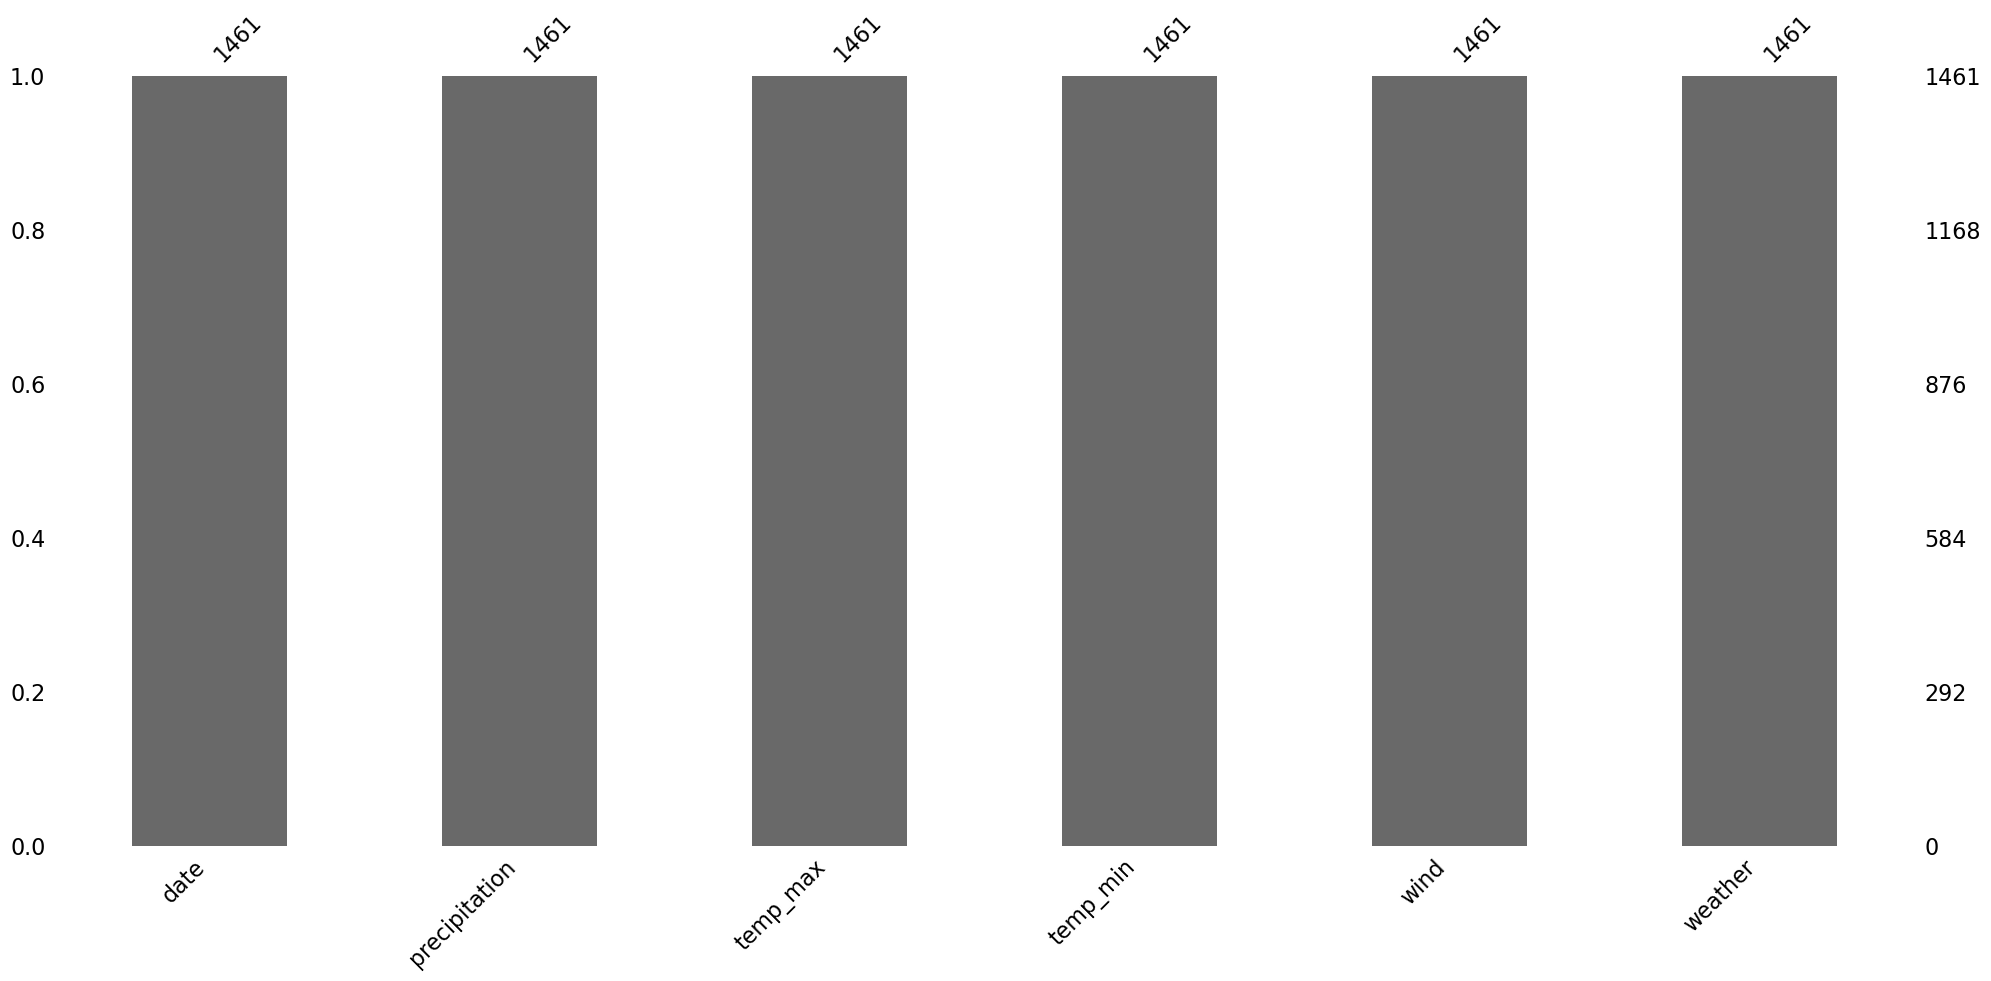

In [5]:
msno.bar(data)

<Axes: >

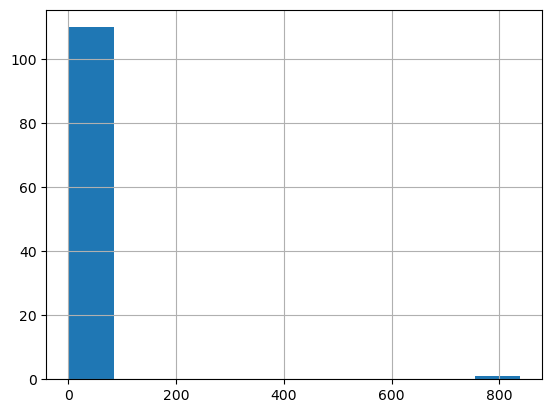

In [6]:
data.precipitation.value_counts().hist(bins = 10)

/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='weather', ylabel='count'>

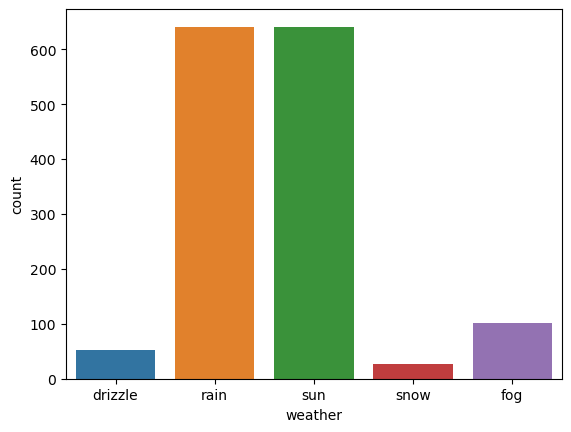

In [7]:
sns.countplot(x='weather',data=data)

/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='weather', ylabel='precipitation'>

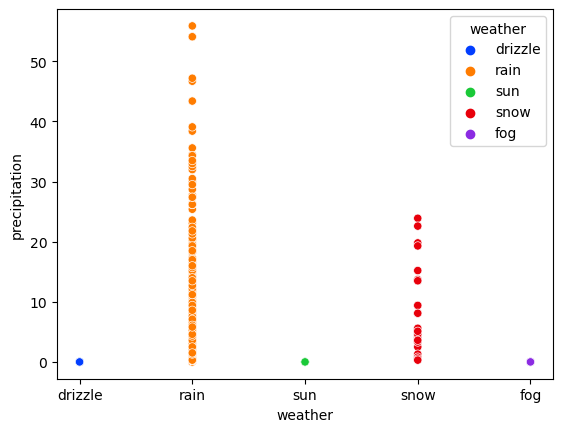

In [8]:
sns.scatterplot(x='weather',y='precipitation', data=data,palette='bright',hue='weather')

/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='temp_min'>

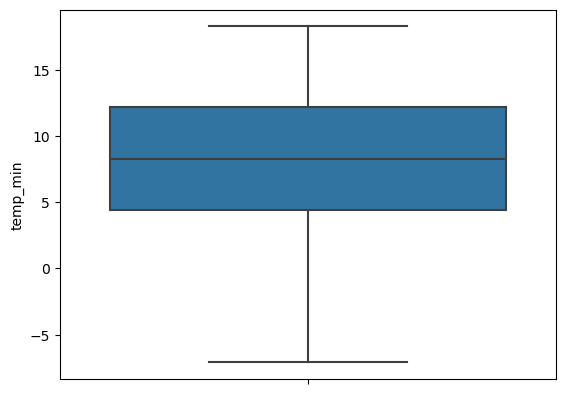

In [9]:
sns.boxplot(y='temp_min',data=data)

/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gagan/project/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='temp_min', ylabel='Count'>

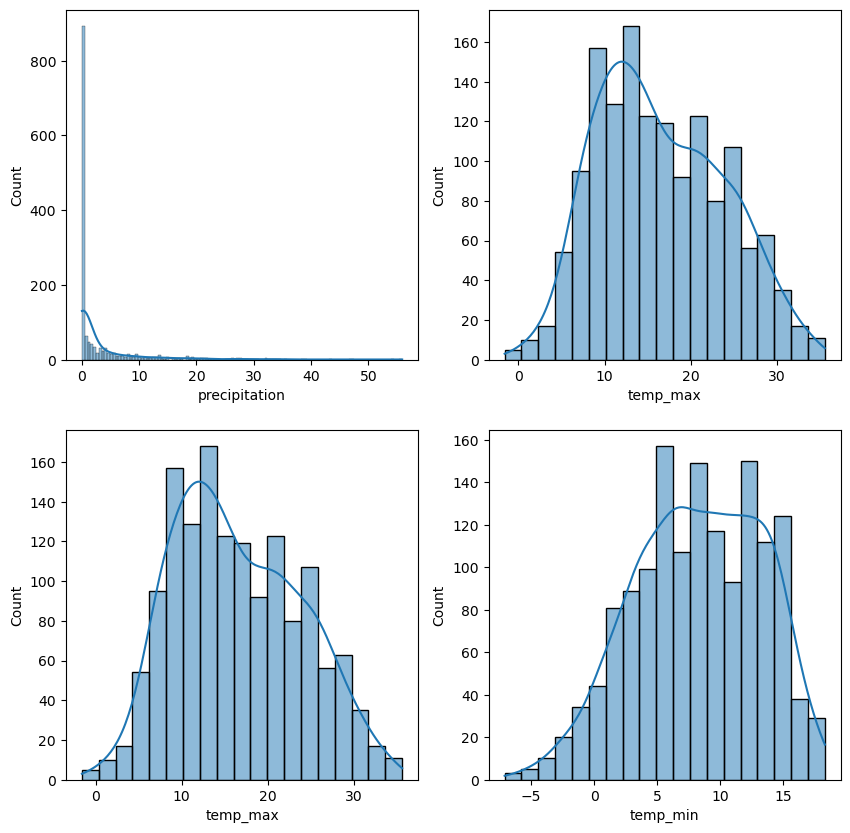

In [10]:
fig, axes=plt.subplots(2,2,figsize=(10,10))
sns.histplot(x='precipitation',kde=True,data=data,ax=axes[0,0])
sns.histplot(x='temp_max',kde=True,data=data,ax=axes[0,1])
sns.histplot(x='temp_max',kde=True,data=data,ax=axes[1,0])
sns.histplot(x='temp_min',kde=True,data=data,ax=axes[1,1])

In [11]:
x=data.drop(columns=['date','weather'],axis=1)
y=data['weather']

In [12]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8,random_state=101)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

/Users/gagan/project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.predict(x_train)

array(['rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'r

In [16]:
model.fit(x_test,y_test)

/Users/gagan/project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
model.score(x_test,y_test)

0.8383233532934131

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        45
         fog       0.00      0.00      0.00        85
        rain       0.96      0.93      0.94       514
        snow       0.62      0.23      0.33        22
         sun       0.75      0.99      0.85       503

    accuracy                           0.84      1169
   macro avg       0.47      0.43      0.43      1169
weighted avg       0.76      0.84      0.79      1169



/Users/gagan/project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gagan/project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gagan/project/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
model.predict([[4,4,0,5]])

/Users/gagan/project/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['rain'], dtype=object)

In [21]:
import pickle

In [22]:
model_filename = "/Users/gagan/project/model.pkl"

In [23]:
model_file = open(model_filename, 'wb')
pickle.dump(model, model_file)
model_file.close()